In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


Assignment 3, Part 1: Using the built-in Seaborn dataset mpg, provide a heatmap of the
correlation of all the numeric columns and provide a pairplot of the same

In [2]:
mpg = sns.load_dataset("mpg")
mpg.head()
print(mpg.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object


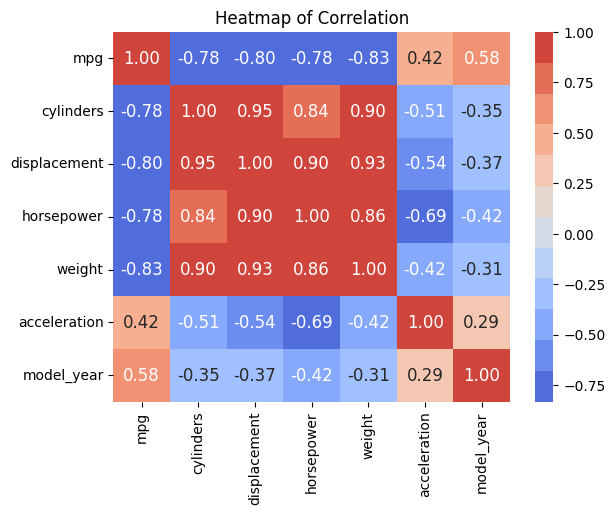

In [3]:

cols = mpg.select_dtypes(include=["float64", "int64"]).columns.tolist()
correlation_heat_map = mpg[cols].corr()
my_palette = sns.color_palette("coolwarm", 12)
heatmap = sns.heatmap(data=correlation_heat_map, annot=True, cmap=my_palette, fmt=".2f", annot_kws={"fontsize":12})
heatmap.set(title='Heatmap of Correlation')
plt.yticks(rotation=0)
plt.show()



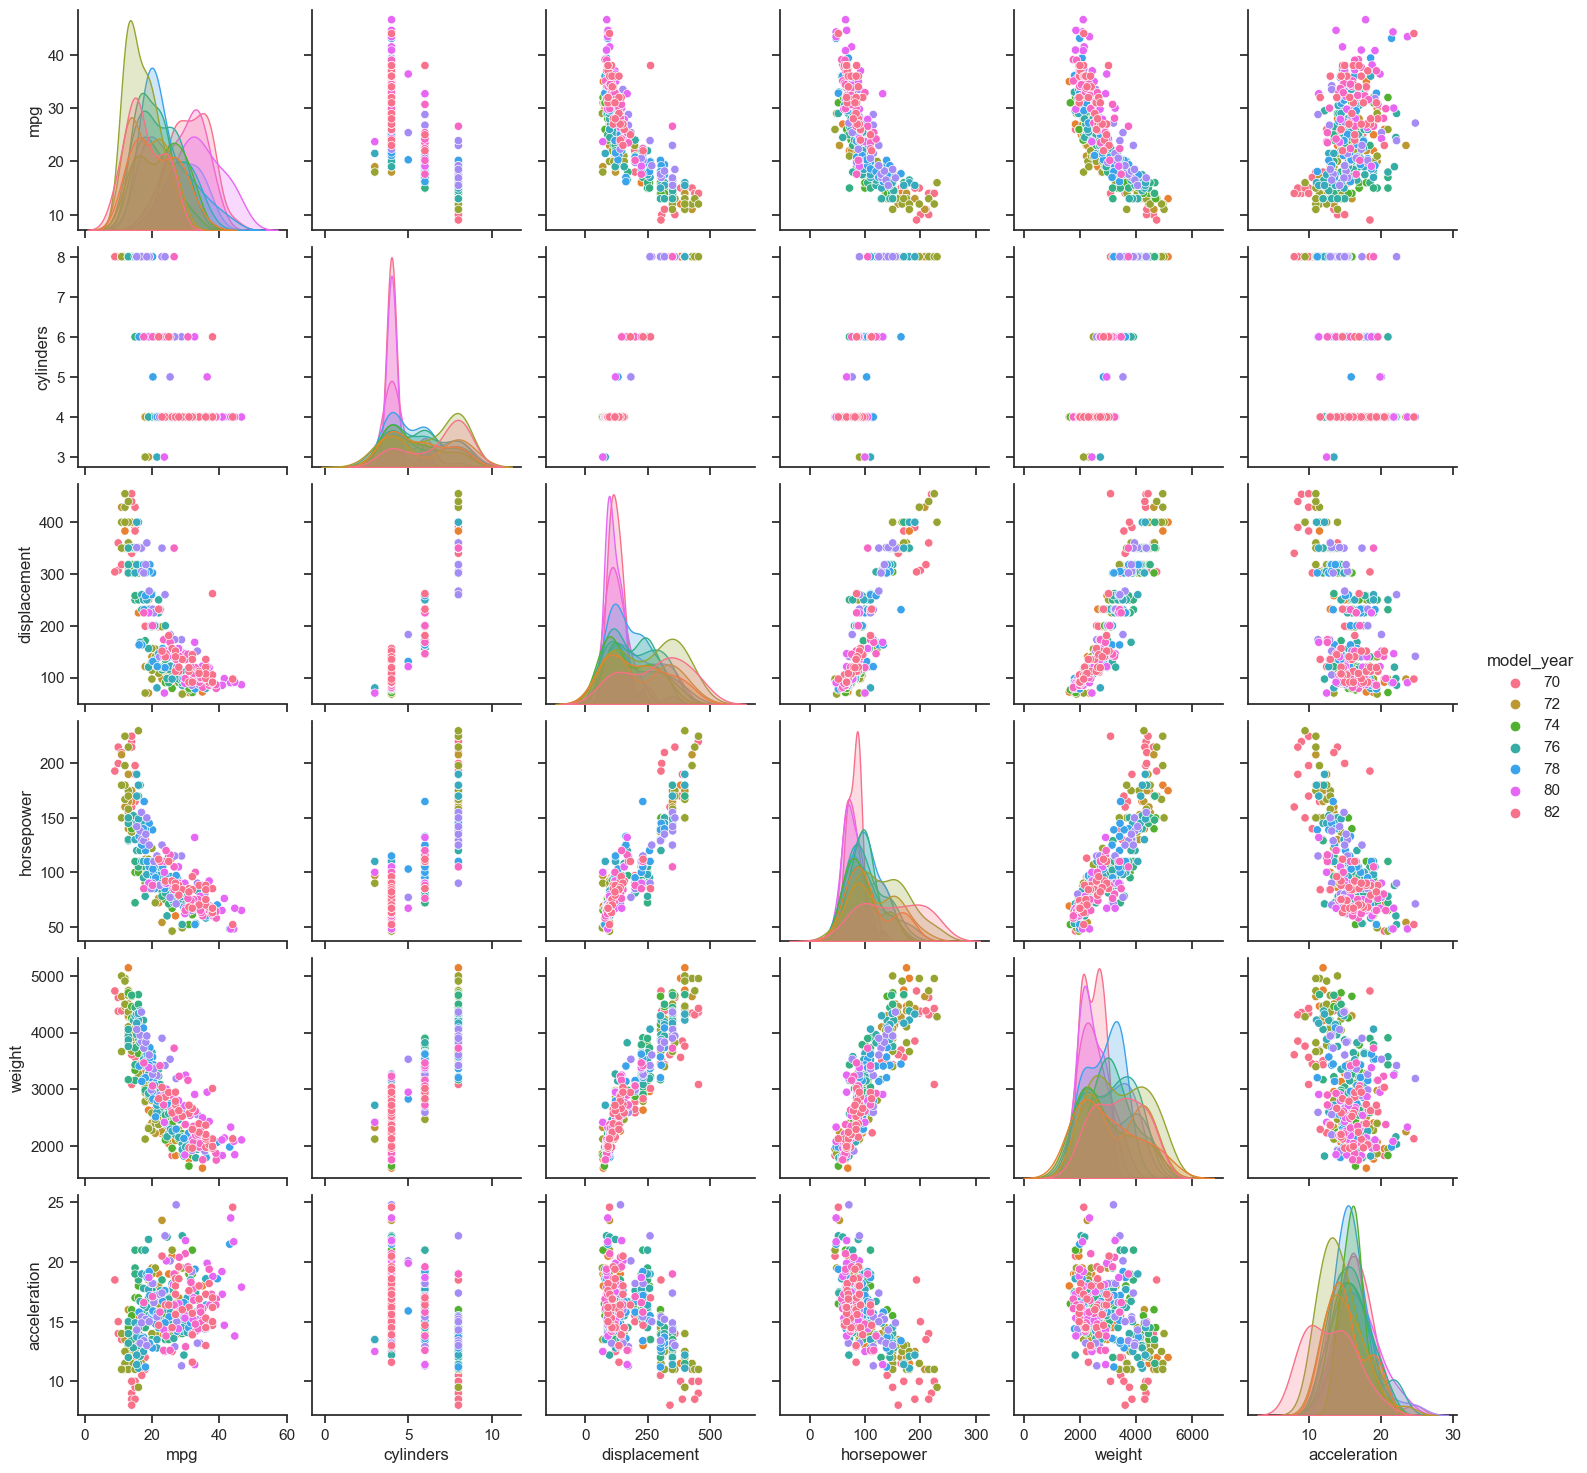

In [4]:
mpg = sns.load_dataset("mpg")
sns.set(style="ticks", color_codes=True)
sns.pairplot(mpg[cols], hue = "model_year", palette = "husl") 
plt.show()

Using the built-in Seaborn dataset diamonds, establish a
FacetGrid based on ‘cut’ and ‘color’. Eliminate colors ‘D’ and ‘E’ as well as the cut ‘Fair’.
Within that grid, plot the scatterplot for ‘price’ vs. ‘carat’.

In [5]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()
#print(diamonds.dtypes)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:

diamonds = diamonds[(~diamonds.color.isin(["D","E"])) & (diamonds.cut!="Fair")]
diamonds["color"] = diamonds["color"].cat.remove_unused_categories()
diamonds["cut"] = diamonds["cut"].cat.remove_unused_categories()


In [7]:
double_check = diamonds.loc[(diamonds["color"].isin(["D", "E"])) & (diamonds["cut"] == "Fair")] #should've worked but had to double check
double_check

,carat,cut,color,clarity,depth,table,price,x,y,z


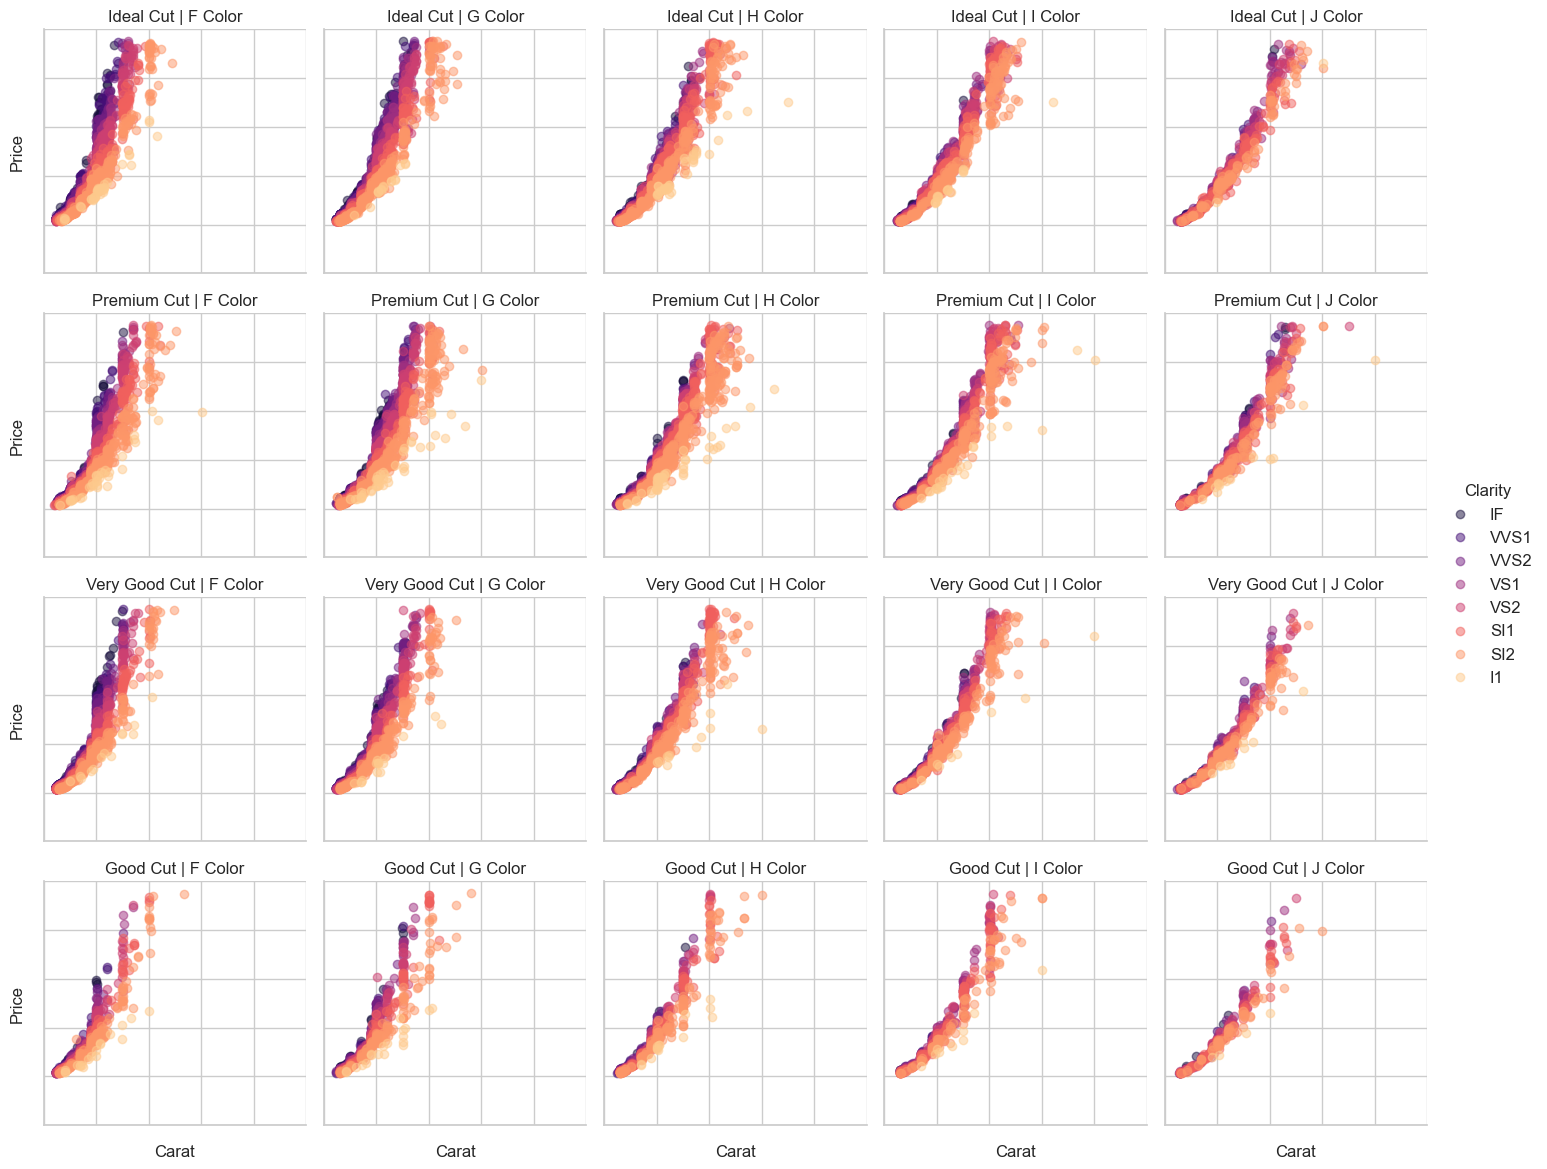

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.set()
sns.set_style('whitegrid')


facet_grid = sns.FacetGrid(diamonds, col='color', row='cut', hue='clarity', palette='magma') # facet grid and set hue as clarity from experiences engagement ring shopping
facet_grid.map(plt.scatter, 'carat', 'price', alpha=0.5)# scatter plot

#set custom labels/legends and tweak to make it look better
facet_grid.set_titles(col_template="{col_name} Color", row_template="{row_name} Cut")
facet_grid.add_legend(title='Clarity', fontsize=12)
facet_grid.set_axis_labels('Carat', 'Price')
facet_grid.set_xticklabels(fontsize=12)
facet_grid.set_yticklabels(fontsize=12)
facet_grid._legend.set_title('Clarity')

plt.show()


Using the built-in Seaborn dataset car_crashes, prepare plots with
a scattergram with the linear model for both the total vs. speeding and the total vs.
alcohol

In [9]:
car_crashes = sns.load_dataset("car_crashes")
car_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<function matplotlib.pyplot.show(close=None, block=None)>

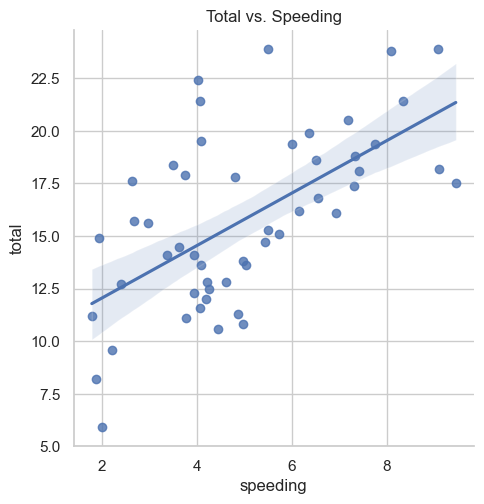

In [10]:
sns.lmplot(x="speeding", y='total', data = car_crashes)
plt.title("Total vs. Speeding")
plt.show

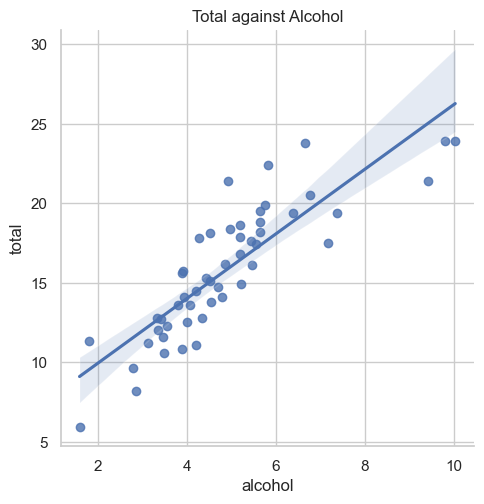

In [11]:
sns.lmplot(x='alcohol', y='total', data = car_crashes)
plt.title('Total against Alcohol')
plt.show()

 Assignment 3, Part 4: Using the built-in Seaborn dataset iris, provide a plot with four
subplots wherein the distribution of each of the numeric columns is presented as a set of
boxplots, one for each ‘species’.

In [12]:
flowers = sns.load_dataset('iris')
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


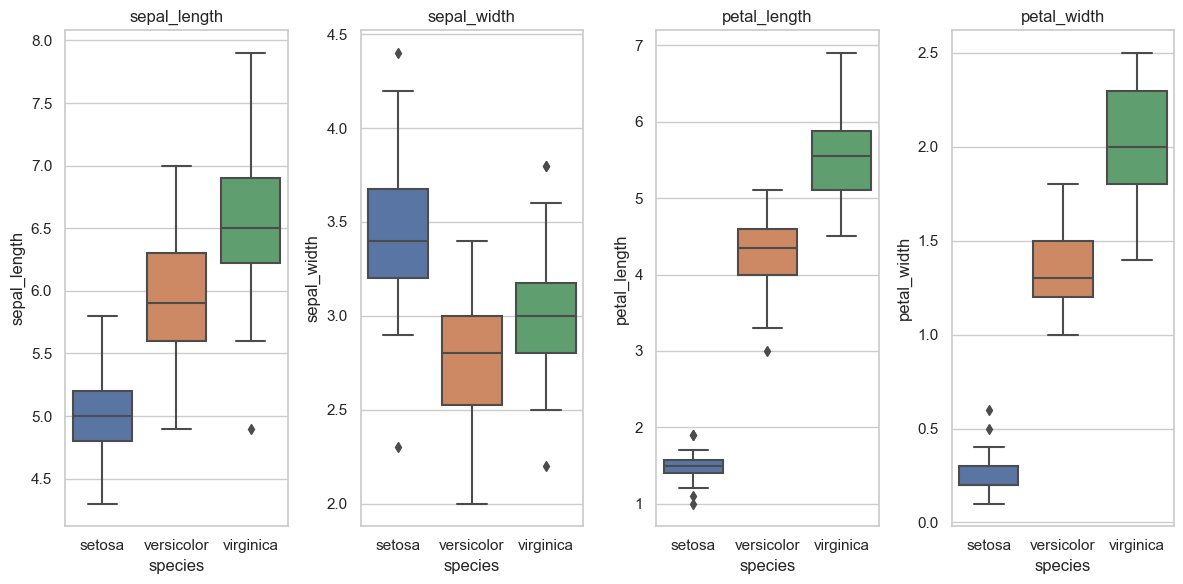

In [13]:
flower_cols = flowers.select_dtypes(include=["float64"]).columns.tolist()

fig, axs = plt.subplots(ncols=4, figsize = (12, 6))
for i, col in enumerate(flower_cols):
  sns.boxplot(x = 'species', y=col, data=flowers, ax=axs[i]) #set x to species and y to column variable, set subplot
  axs[i].set_title(col)

plt.tight_layout()
plt.show()